<h1> Search practice. </h1>

## Citibike only search.

In [1]:
import pandas as pd
import numpy as np  
from scipy.spatial import KDTree
import pylab as pl

In [36]:
# Given start and end locations, find a route.
start_coords = [40.677537, -73.959066]
end_coords = [40.7395441,-73.9885504]

In [3]:
# Import citibike loations.
df = pd.read_csv('../data/citibike/citibike_stations.csv', index_col = 0)

In [4]:
def convert_long(longitude):
    return longitude*52.32
def convert_lat(latitude):
    return latitude*69.135

In [5]:
# Convert lat, long to miles.
#df.horizontal = df.longitude*np.cos(df.latitude*np.pi/180.)*69.135
df['horizontal'] = df.longitude.apply(convert_long)
df['vertical'] = df.latitude.apply(convert_lat)

In [37]:
start[0] = convert_lat(start_coords[0])
start[1] = convert_long(start_coords[1])
end[0] = convert_lat(end_coords[0])
end[1] = convert_long(end_coords[1])

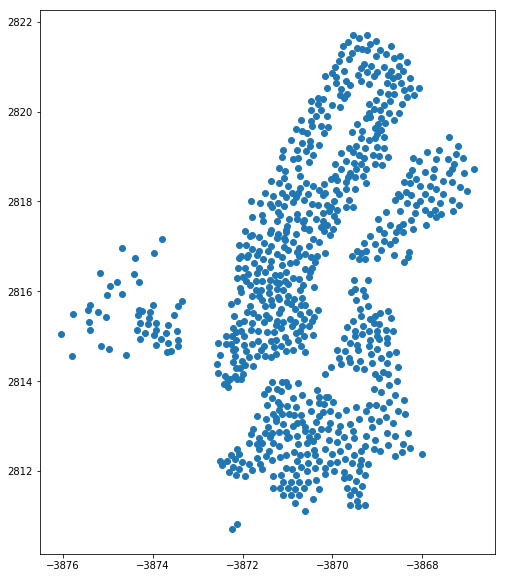

In [7]:
fig, ax = pl.subplots(figsize=(10,10))
ax.scatter(df.horizontal, df.vertical)
ax.set_aspect('equal')

<h2> Using a KDtree to find the stations within walking distance of the start and end locations. </h2>

In [8]:
tree = KDTree(df[['vertical', 'horizontal']])

In [9]:
inds = tree.query_ball_point(start, 0.25)
start_stations = df.iloc[inds]
inds = tree.query_ball_point(end, 0.25)
end_stations = df.iloc[inds]

In [10]:
end_stations

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusValue,testStation,totalDocks,horizontal,vertical
230,NaN,50,11,NaN,497,NaN,2019-01-18 02:42:57 PM,40.737050,NaN,-73.990093,NaN,E 17 St & Broadway,NaN,E 17 St & Broadway,In Service,False,66,-3871.161664,2816.355941
236,NaN,22,5,NaN,503,NaN,2019-01-18 02:45:17 PM,40.738274,NaN,-73.987520,NaN,E 20 St & Park Ave,NaN,E 20 St & Park Ave,In Service,False,31,-3871.027030,2816.440592
3,NaN,18,17,NaN,402,NaN,2019-01-18 02:45:52 PM,40.740343,NaN,-73.989551,NaN,Broadway & E 22 St,NaN,Broadway & E 22 St,In Service,False,39,-3871.133313,2816.583627
224,NaN,37,12,NaN,491,NaN,2019-01-18 02:46:18 PM,40.740964,NaN,-73.986022,NaN,E 24 St & Park Ave S,NaN,E 24 St & Park Ave S,In Service,False,51,-3870.948678,2816.626528
758,NaN,41,11,NaN,3641,NaN,2019-01-18 02:45:07 PM,40.742869,NaN,-73.989186,NaN,Broadway & W 25 St,NaN,Broadway & W 25 St,In Service,False,54,-3871.114227,2816.758233


In [11]:
start_stations

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusValue,testStation,totalDocks,horizontal,vertical
675,NaN,1,20,NaN,3546,NaN,2019-01-18 02:45:11 PM,40.679194,NaN,-73.958790,NaN,Pacific St & Classon Ave,NaN,Pacific St & Classon Ave,In Service,False,21,-3869.523908,2812.356105
677,NaN,1,23,NaN,3549,NaN,2019-01-18 02:45:45 PM,40.678045,NaN,-73.962408,NaN,Grand Ave & Bergen St,NaN,Grand Ave & Bergen St,In Service,False,25,-3869.713187,2812.276641
689,NaN,4,23,NaN,3562,NaN,2019-01-18 02:43:34 PM,40.676520,NaN,-73.959608,NaN,Classon Ave & St Marks Ave,NaN,Classon Ave & St Marks Ave,In Service,False,27,-3869.566701,2812.171196
697,NaN,3,26,NaN,3569,NaN,2019-01-18 02:46:15 PM,40.675832,NaN,-73.956168,NaN,Franklin Ave & St Marks Ave,NaN,Franklin Ave & St Marks Ave,In Service,False,29,-3869.386694,2812.123673
774,NaN,10,11,NaN,3673,NaN,2019-01-18 02:44:17 PM,40.677592,NaN,-73.955637,NaN,Dean St & Franklin Ave,NaN,Dean St & Franklin Ave,In Service,False,21,-3869.358939,2812.245328


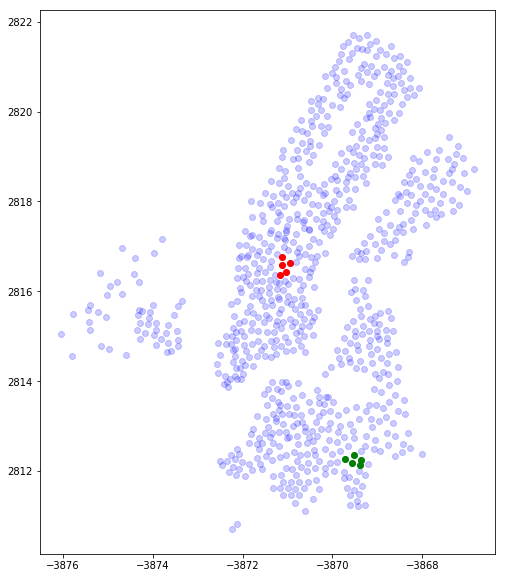

In [12]:
fig, ax = pl.subplots(figsize=(10,10))
ax.scatter(df.horizontal, df.vertical, color='b', alpha=0.2)
ax.scatter(start_stations.horizontal, start_stations.vertical, color='g')
ax.scatter(end_stations.horizontal, end_stations.vertical, color='r')
ax.set_aspect('equal')

<h2> Calling all routes... </h2>

In [13]:
routes = pd.read_csv('/media/mark/TOSHIBA EXT1/Projects/InAPinch/data/citibike/all_stations.csv', nrows=10, sep='\t')

In [14]:
import requests
import json

In [54]:
def get_directions(start, end, mode, modes={'foot':5000, 'cycle':5001}):
    url = "http://127.0.0.1:{}/route/v1/{}/{},{};{},{}?steps=true"
    url = url.format(modes[mode], mode,
                     start[0], start[1], 
                     end[0], end[1])
    print(url)
    r = requests.get(url)
    return json.loads(r.content)['routes'][0]

In [60]:
r = get_directions(start_stations.iloc[0][['longitude', 'latitude']].values, 
                   end_stations.iloc[1][['longitude', 'latitude']].values, 'foot');

http://127.0.0.1:5000/route/v1/foot/-73.95879029999999,40.67919439999999;-73.98751968,40.73827428?steps=true


In [61]:
r['duration']

2283.8

<h2> Brief Foray into Dijkstra's algorithm. </h2>

In [19]:
nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
distances = {
    'B': {'A': 5, 'D': 1, 'G': 2},
    'A': {'B': 5, 'D': 3, 'E': 12, 'F' :5},
    'D': {'B': 1, 'G': 1, 'E': 1, 'A': 3},
    'G': {'B': 2, 'D': 1, 'C': 2},
    'C': {'G': 2, 'E': 1, 'F': 16},
    'E': {'A': 12, 'D': 1, 'C': 1, 'F': 2},
    'F': {'A': 5, 'E': 2, 'C': 16}}

In [20]:
from collections import defaultdict


def get_shortest_path(weighted_graph, start, end):
    """
    Calculate the shortest path for a directed weighted graph.

    Node can be virtually any hashable datatype.

    :param start: starting node
    :param end: ending node
    :param weighted_graph: {"node1": {"node2": "weight", ...}, ...}
    :return: ["START", ... nodes between ..., "END"] or None, if there is no
            path
    """

    # We always need to visit the start
    nodes_to_visit = {start}
    visited_nodes = set()
    distance_from_start = defaultdict(lambda: float("inf"))
    # Distance from start to start is 0
    distance_from_start[start] = 0
    tentative_parents = {}
    
    while nodes_to_visit:
        # The next node should be the one with the smallest weight
        current = min(
            [(distance_from_start[node], node) for node in nodes_to_visit]
        )[1]

        # The end was reached
        if current == end:
            break

        nodes_to_visit.discard(current)
        visited_nodes.add(current)

        for neighbour, distance in weighted_graph[current].items():
            if neighbour in visited_nodes:
                continue
            neighbour_distance = distance_from_start[current] + distance
            if neighbour_distance < distance_from_start[neighbour]:
                distance_from_start[neighbour] = neighbour_distance
                tentative_parents[neighbour] = current
                nodes_to_visit.add(neighbour)

    return _deconstruct_path(tentative_parents, end)


def _deconstruct_path(tentative_parents, end):
    if end not in tentative_parents:
        return None
    cursor = end
    path = []
    while cursor:
        path.append(cursor)
        cursor = tentative_parents.get(cursor)
    return list(reversed(path))

In [21]:
get_shortest_path(distances, 'B', 'F')

['B', 'D', 'E', 'F']

<h2> Constructing walking + citibike graph. </h2>

<h3> Walking directions first.. </h3>

In [73]:
nodes = {}
for _, start_row in start_stations.iterrows():
    r = get_directions(start_coords[::-1], start_row[['longitude', 'latitude']], 'foot')
    nodes.update({start_row.id:r['duration']})
    
graph = {'start': nodes}

http://127.0.0.1:5000/route/v1/foot/-73.959066,40.677537;-73.95879029999999,40.67919439999999?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.959066,40.677537;-73.962408,40.678045000000004?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.959066,40.677537;-73.9596082,40.676519799999994?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.959066,40.677537;-73.95616770000001,40.6758324?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.959066,40.677537;-73.95563721656801,40.67759206937376?steps=true


In [75]:
for _, end_row in end_stations.iterrows():
    r = get_directions(end_coords[::-1], end_row[['longitude', 'latitude']], 'foot')
    graph.update({end_row.id:{'end':r['duration']}})

http://127.0.0.1:5000/route/v1/foot/-73.9885504,40.7395441;-73.99009296,40.73704984?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.9885504,40.7395441;-73.98751968,40.73827428?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.9885504,40.7395441;-73.98955109,40.740343200000005?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.9885504,40.7395441;-73.98602213,40.74096374?steps=true
http://127.0.0.1:5000/route/v1/foot/-73.9885504,40.7395441;-73.98918628692627,40.74286877312112?steps=true


In [76]:
graph

{'start': {3546: 59.2, 3549: 87, 3562: 113.2, 3569: 154.2, 3673: 94.1},
 497: {'end': 139.7},
 503: {'end': 117.6},
 402: {'end': 76.3},
 491: {'end': 227.3},
 3641: {'end': 327.4}}

In [77]:
routes = pd.read_csv('/media/mark/TOSHIBA EXT1/Projects/InAPinch/data/citibike/all_stations_durations_docks.csv', sep='\t')

In [78]:
routes.dock_id1 = routes.dock_id1.astype(int)
routes.dock_id2 = routes.dock_id2.astype(int)
routes.set_index(['dock_id1', 'dock_id2'], inplace=True)
routes.sort_index(inplace=True)

In [82]:
for _, start_row in start_stations.iterrows():
    nodes = {}
    for _, end_row in end_stations.iterrows():
        nodes.update({end_row.id : routes.loc[start_row.id, end_row.id]['duration']})
    graph.update({start_row.id:nodes})

In [83]:
graph

{'start': {3546: 59.2, 3549: 87, 3562: 113.2, 3569: 154.2, 3673: 94.1},
 497: {'end': 139.7},
 503: {'end': 117.6},
 402: {'end': 76.3},
 491: {'end': 227.3},
 3641: {'end': 327.4},
 3546: {497: 2283.5, 503: 2283.8, 402: 2414.7, 491: 2392.0, 3641: 2579.2},
 3549: {497: 2255.2, 503: 2255.5, 402: 2386.4, 491: 2363.7, 3641: 2550.9},
 3562: {497: 2337.0, 503: 2337.3, 402: 2468.2, 491: 2445.5, 3641: 2632.7},
 3569: {497: 2417.2, 503: 2417.5, 402: 2548.4, 491: 2525.7, 3641: 2712.9},
 3673: {497: 2404.2, 503: 2404.5, 402: 2535.4, 491: 2512.7, 3641: 2699.9}}

In [84]:
get_shortest_path(graph, 'start', 'end')

['start', 3549, 503, 'end']

<h1> Yaaay! I've implemented a poor man's version of citibike route planner! </h1>